In [55]:
!pip install yfinance

In [56]:
import yfinance as yf
import pandas as pd
import os

In [57]:

# Liste des symboles des actions à sélectionner
stock_symbols = ['AAPL'] #, 'MSFT', 'GOOGL', 'AMZN', 'TSLA']


In [58]:
def fetch_portfolio(stock_list):
    pf_final = pd.DataFrame()
    for stock in stock_symbols:
        pf = yf.Ticker(stock)
        pf = pf.history(period="max")
        pf_final = pd.concat([pf_final, pf])
    return pf_final

In [59]:
# if os.path.exists("./data/portfolio01.csv"):
#     portfolio01 = pd.read_csv("./data/portfolio01.csv", index_col=0)
# else:
#     portfolio01 = fetch_portfolio(stock_symbols)
#     portfolio01.to_csv("./data/portfolio01.csv")
portfolio01 = fetch_portfolio(stock_symbols)

In [60]:
portfolio01.index = pd.to_datetime(portfolio01.index)

In [61]:
# We get more than 10,000 records depending on when the Stock was cerated. Each row relates to one trading day
# We are not going to use the Dividends and Stock Splits to keep things simple. If Splits is on our way, we will assess the changes
# We are going to use the columns [ 'Open', 'High', 'Low', 'Close', 'Volume'] to predict whether the price of the stock will go up or down the following day

portfolio01

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,172.940002,174.380005,172.050003,172.750000,60139500,0.0,0.0
2024-03-12 00:00:00-04:00,173.149994,174.029999,171.009995,173.229996,59825400,0.0,0.0
2024-03-13 00:00:00-04:00,172.770004,173.190002,170.759995,171.130005,52488700,0.0,0.0


<Axes: xlabel='Date'>

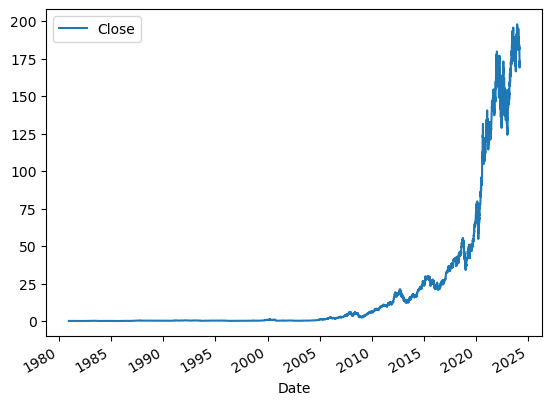

In [62]:
# Let's look at the evolution of the stock using the value on the closing time
portfolio01.plot.line(y="Close", use_index=True)

In [63]:
del portfolio01["Dividends"]
del portfolio01["Stock Splits"]

In [64]:
# Let's take the value of the following trading day and to build a Target variable on the current day
# This is how we are going to qualify a day as being a good day to invest or not
portfolio01["Tomorrow"] = portfolio01["Close"].shift(-1)
portfolio01["Target"] = (portfolio01["Tomorrow"] > portfolio01["Close"]).astype(int)

In [67]:
portfolio01

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.248953,0.264843,0.247188,0.263078,183198400,0.264843,1
1990-01-03 00:00:00-05:00,0.268375,0.268375,0.264843,0.264843,207995200,0.265727,1
1990-01-04 00:00:00-05:00,0.270141,0.273672,0.263078,0.265727,221513600,0.266610,1
1990-01-05 00:00:00-05:00,0.266610,0.270141,0.261312,0.266610,123312000,0.268375,1
1990-01-08 00:00:00-05:00,0.264843,0.268375,0.261312,0.268375,101572800,0.265727,0
...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,172.940002,174.380005,172.050003,172.750000,60139500,173.229996,1
2024-03-12 00:00:00-04:00,173.149994,174.029999,171.009995,173.229996,59825400,171.130005,0
2024-03-13 00:00:00-04:00,172.770004,173.190002,170.759995,171.130005,52488700,173.000000,1


In [65]:
# Making a new Portfolio choosing a start date until today
portfolio01 = portfolio01.loc["1990-01-01":].copy()

We are going to use RandomForestClassifier. It runs several DecisionTrees algorithms with randomized parameters and average the results<br>
It does not overfit as much. It picks non linear relationships, which caracterize Trading data<br>
min_ samples_split not too high to prevent Decition Trees to go too deep, and overfit<br>
We cannot use cross validation with time series type of data, otherwise we would be leaking information

In [69]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = portfolio01.iloc[:-100]
test = portfolio01.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [70]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.45652173913043476

That's a predict bad model to predict. Looks like we would be losing money

<Axes: xlabel='Date'>

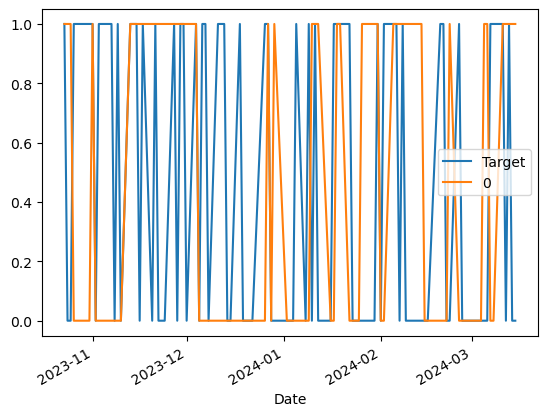

In [71]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

We are going to trigger the model on the historical data, going back 10 years and evaluating the result for the following year<br>
Take 11 years of data, and predict for the following year...

In [39]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [72]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions) # Concatenate a list of dataframes into a dataframe

In [73]:
predictions = backtest(portfolio01, model, predictors)

Numbers of predictions that market will go up or down

In [74]:
predictions["Predictions"].value_counts()

Predictions
0.0    5550
1.0     567
Name: count, dtype: int64

In [75]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5149911816578483

Actual behavior of the Stock to compare to our prediction. Better off waking up and investing each day

In [76]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.520353
0    0.479647
Name: count, dtype: float64

We are going to add as predictors, the information regarding the stock value 2 days ago, a week, 3 months and 4 years<br>
The rolling method is useful calculating moving averages or other rolling window calculations in time series data or any sequential data

In [45]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = portfolio01.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    portfolio01[ratio_column] = portfolio01["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    portfolio01[trend_column] = portfolio01.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

Drop the NaN values from the dataframe<br>
Note: this will dramatically reduce the number of rows because of the rolling computation over 4 years

In [46]:
portfolio01 = portfolio01.dropna(subset=portfolio01.columns[portfolio01.columns != "Tomorrow"])

In [47]:
portfolio01

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,0.215566,0.219251,0.213724,0.214645,293664000,0.219251,1,0.993604,1.0,0.978993,1.0,1.007241,22.0,0.694753,111.0,0.637248,462.0
1993-12-15 00:00:00-05:00,0.213724,0.219251,0.213724,0.219251,123883200,0.216488,0,1.010615,1.0,1.014493,2.0,1.025699,23.0,0.711547,111.0,0.651010,462.0
1993-12-16 00:00:00-05:00,0.217409,0.219251,0.213724,0.216488,126369600,0.217409,1,0.993658,1.0,1.005994,2.0,1.010468,22.0,0.704569,110.0,0.642898,461.0
1993-12-17 00:00:00-05:00,0.217409,0.219251,0.214645,0.217409,145152000,0.210039,0,1.002123,1.0,1.001698,3.0,1.011960,23.0,0.709636,110.0,0.645728,461.0
1993-12-20 00:00:00-05:00,0.215567,0.219251,0.208196,0.210039,189033600,0.202669,0,0.982758,1.0,0.974358,2.0,0.975652,22.0,0.687599,110.0,0.623946,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,172.940002,174.380005,172.050003,172.750000,60139500,173.229996,1,1.005881,2.0,1.014124,2.0,0.927380,22.0,0.961397,128.0,1.192018,521.0
2024-03-12 00:00:00-04:00,173.149994,174.029999,171.009995,173.229996,59825400,171.130005,0,1.001387,2.0,1.013242,3.0,0.931998,22.0,0.963608,128.0,1.194363,522.0
2024-03-13 00:00:00-04:00,172.770004,173.190002,170.759995,171.130005,52488700,173.000000,1,0.993902,1.0,0.998611,3.0,0.922912,21.0,0.951525,127.0,1.178938,522.0


In [48]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

Let's consider that if the probability of the price of the stock goes up is greater than 0.6 instead of 0.5 the default

In [49]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

We are going to trade of fewer days

In [50]:
predictions = backtest(portfolio01, model, new_predictors)

In [51]:
predictions["Predictions"].value_counts()

Predictions
0.0    4582
1.0     535
Name: count, dtype: int64

In [52]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5214953271028038

In [53]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.529021
0    0.470979
Name: count, dtype: float64

In [54]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,0.0
2003-11-18 00:00:00-05:00,1,0.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,0,0.0
...,...,...
2024-03-11 00:00:00-04:00,1,0.0
2024-03-12 00:00:00-04:00,0,0.0
2024-03-13 00:00:00-04:00,1,0.0
